Este es el proyecto inicial para todo que comienza en la Ciencia de Datos. Es sobre el Titanic, y el objetivo del mismo es saber quien podría sobrevivir según las variables recolectadas. Vamos a utilizar la siguiente metodologia para desarrollar el proyecto: CRISP-DM (Cross Industry Standard Process for Data Mining).

Business Understanding (Entendimiento del Negocio): Definir los objetivos del negocio y convertirlos en un problema de datos que pueda ser resuelto con técnicas de análisis.

Data Understanding (Entendimiento de los Datos): Recopilar y explorar los datos para comprender su calidad y estructura, y determinar cómo pueden ser utilizados para abordar el problema de negocio.

Data Preparation (Preparación de los Datos): Limpiar y transformar los datos para adecuarlos a los requisitos del análisis y modelado.

Modeling (Modelado): Aplicar técnicas analíticas y de modelado para construir modelos predictivos o descriptivos que aborden el problema definido.

Evaluation (Evaluación): Evaluar el modelo y los resultados en función de los objetivos del negocio para asegurar que el modelo cumple con los requisitos y ofrece valor.

Deployment (Despliegue): Implementar el modelo en un entorno de producción para que pueda ser utilizado en el proceso de toma de decisiones o en operaciones diarias.

Primeramente comenzaré importando las librerías básicas

In [25]:
import pandas as pd #manipulacion de los datos
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer #imputar valores nulos
from sklearn.preprocessing import OrdinalEncoder

2 paso: Entedimiento de los datos
vamos a leer los archivos

In [26]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

vision general de nuestro dataset "Parch" = "Number of Parents/Children Aboard" "SibSp" es una abreviatura para "Siblings/Spouses" Fare: tarifa

In [27]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
346,347,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C


In [28]:
df_train.shape

(891, 12)

tipos de datos

In [29]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


ver valores duplicados:

In [31]:
df_train.duplicated().sum()

0

valores nulosy los ordeno por aquellos que tienen mayor cantidad

In [32]:
df_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Ahora vamos a ver los valores únicos De esto podemos sacar que los que tienen muchos valores únicos no nos sirven para la predicción

In [33]:
df_train.nunique().sort_values(ascending=True)

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

voy a crear las columnas categoricas, son aquellas de tipo object voy a recorre cada una de las columnas categoricas df_train[column].nunique():Función: Cuenta el número de valores unicos de la columna column print(f'{column}: {df_train[column].unique()}'):Función: Imprime el nombre de la columna y los valores únicos que contiene.

In [34]:
columnas_categoricas = df_train.select_dtypes(include=['object'])
print("Columnas categoricas:", columnas_categoricas.columns)
for column in columnas_categoricas:
    #para que acceda a las que son unicas
    if df_train[column].nunique()<=10:
        print(f'{column}: {df_train[column].unique()}')

Columnas categoricas: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]


ahora voy a hacer lo mismo de lo anterior, pero con las columnas numericas. voy a ver los valores únicos de las columnas numericas.

In [35]:
columnas_numericas = df_train.select_dtypes(include=['int64', 'int64'])
print("Columnas numericas:", columnas_numericas.columns)
for column in columnas_numericas:
    #para que acceda a las que son unicas
    if df_train[column].nunique()<=10:
        print(f'{column}: {sorted(df_train[column].unique())}')

Columnas numericas: Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')
Survived: [0, 1]
Pclass: [1, 2, 3]
SibSp: [0, 1, 2, 3, 4, 5, 8]
Parch: [0, 1, 2, 3, 4, 5, 6]


EDA: Voy a hacer un pequeño análisis exploratorio de quienes sobrevivieron. Lo que veo en el grafico es que la mayoria no sobrevivio

<Axes: xlabel='Survived', ylabel='count'>

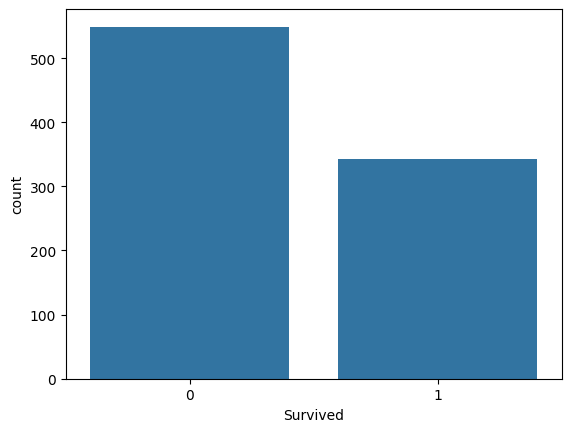

In [36]:
sns.countplot(x='Survived',data=df_train)

voy a ver el sexo de las personas que sobrevivieron. De esto deduzco que la mayoria eran mujeres

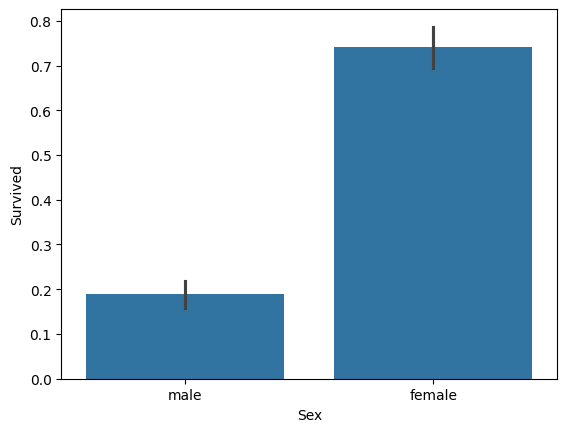

In [37]:
sns.barplot(x='Sex', y='Survived',data=df_train)
plt.show()

CONCLUSIONES: PassengerId, Name, Ticket, Fare y Cabin(tiene valores nulos Cabin) no aportan mucho a la predicción.Por lo tanto, lo mejor va a ser quitarlas del dataset. A excepcción de PassengerId que lo voy a utilizar para realizar Submission

In [38]:
df_train=df_train.drop(columns=['Cabin','Fare','Ticket','Name'])
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


miro si df_test tiene las mismas columnas

In [39]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Como tiene las mismas columnas, las elimino las que no aportan al estudio, a excepcion de PassengerId

In [40]:
df_test=df_test.drop(columns=['Cabin','Fare','Ticket','Name'])
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


3er PASO: Preparación de los datos

Lo primero que voy a hacer, es separar las predictoras del target. Para X voy a usar todo menos la columna Survived, para y='Survived', que es la columna a predecir.

In [41]:
X = df_train.drop(columns=['Survived'])
y = df_train['Survived']
print(X.columns, y)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object') 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Transformar las columnas categoricas a numéricas selecciono las columnas categoricas:

In [42]:
s=(X.dtypes=='object')
print(s)
object_cols=list(s[s].index)
print(object_cols)

PassengerId    False
Pclass         False
Sex             True
Age            False
SibSp          False
Parch          False
Embarked        True
dtype: bool
['Sex', 'Embarked']


Transformo las columnas categoricas en numericas usando OrdinalEncoder

In [43]:
ordinal_encoder=OrdinalEncoder()
X[object_cols]=ordinal_encoder.fit_transform(X[object_cols])
X.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,1.0,22.0,1,0,2.0
1,2,1,0.0,38.0,1,0,0.0
2,3,3,0.0,26.0,0,0,2.0
3,4,1,0.0,35.0,1,0,2.0
4,5,3,1.0,35.0,0,0,2.0
5,6,3,1.0,NaN,0,0,1.0
6,7,1,1.0,54.0,0,0,2.0
7,8,3,1.0,2.0,3,1,2.0
8,9,3,0.0,27.0,0,2,2.0
9,10,2,0.0,14.0,1,0,0.0


Rellenar los valores nulos con la libreria SimpleImputer

In [44]:
imputer=SimpleImputer()
x_transformed=pd.DataFrame(imputer.fit_transform(X))
x_transformed.columns=X.columns
x_transformed.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

Transfar en categoricas tambien el dataframe de test para utilizarlo luego en el modelo

In [45]:
df_test[object_cols]=ordinal_encoder.fit_transform(df_test[object_cols])

4to Paso: Creacion del modelo y lo entrenamos

In [46]:
model=RandomForestClassifier()
#lo entrenamos:
model.fit(x_transformed,y)

RandomForestClassifier()

Hacer las predicciones

In [47]:
df_test_transformed=pd.DataFrame(imputer.transform(df_test))
df_test_transformed.columns=df_test.columns

predictions=model.predict(df_test_transformed)

Guardar las predicciones en un archivo submission.csv guardando passengerID y survived

In [48]:
output=pd.DataFrame({'passengerId':df_test.PassengerId, 'survived':predictions})
output.to_csv('submission.csv',index=False)

5to Paso: Evaluacion del modelo

Para realizar la evaluación del modelo (quinto paso en la metodología CRISP-DM), puedes seguir estos pasos:

División del Conjunto de Datos: Divide los datos en conjuntos de entrenamiento y prueba, si no lo has hecho previamente. Esto te permitirá evaluar el rendimiento del modelo en datos que no ha visto antes.

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x_transformed, y, test_size=0.2, random_state=42)


Entrenamiento del Modelo: Entrena el modelo utilizando el conjunto de entrenamiento.

In [50]:
model.fit(X_train, y_train)


RandomForestClassifier()

Predicciones en el Conjunto de Validación: Genera predicciones para el conjunto de validación.

In [51]:
y_pred = model.predict(X_valid)


Métricas de Evaluación: Utiliza métricas como precisión (accuracy), sensibilidad (recall), precisión (en términos de predicciones correctas) y el puntaje F1 para evaluar el rendimiento del modelo. Estas métricas te ayudarán a determinar cuán bien está funcionando el modelo.

python


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.8212
Precision: 0.8281
Recall: 0.7162
F1 Score: 0.7681


Curva ROC y AUC: Para una evaluación más completa, puedes generar la curva ROC y calcular el AUC (Area Under the Curve).

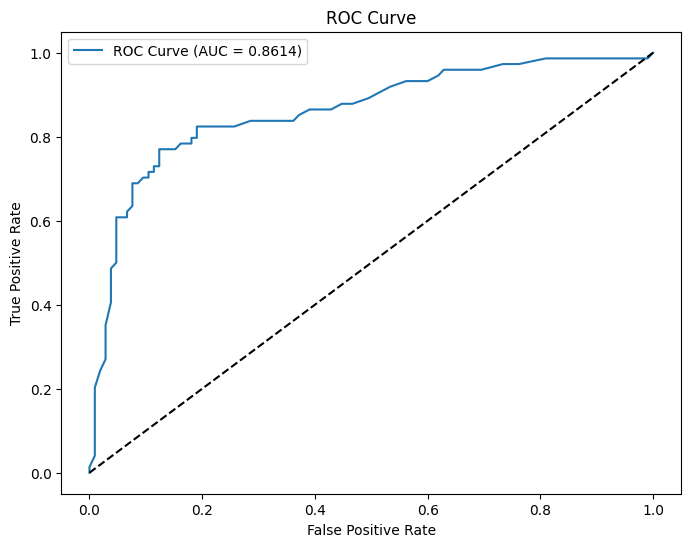

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_valid)[:, 1]  # Probabilidades para la clase positiva
fpr, tpr, thresholds = roc_curve(y_valid, y_probs)
auc = roc_auc_score(y_valid, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
